In [114]:
import polars as pl
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



●	Read csv file named as iris.csv

In [85]:
data = pl.read_csv('Iris.csv')
data.shape

(150, 6)

●	Read csv file named as iris.csv

In [86]:
data.head(5)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
i64,f64,f64,f64,f64,str
1,5.1,3.5,1.4,0.2,"""Iris-setosa"""
2,4.9,3.0,1.4,0.2,"""Iris-setosa"""
3,4.7,3.2,1.3,0.2,"""Iris-setosa"""
4,4.6,3.1,1.5,0.2,"""Iris-setosa"""
5,5.0,3.6,1.4,0.2,"""Iris-setosa"""


●	Show a dataframe which has sepal width greater than 4

In [87]:
data.filter(data['SepalWidthCm'] > 4)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
i64,f64,f64,f64,f64,str
16,5.7,4.4,1.5,0.4,"""Iris-setosa"""
33,5.2,4.1,1.5,0.1,"""Iris-setosa"""
34,5.5,4.2,1.4,0.2,"""Iris-setosa"""


●	Show a dataframe which has petal width greater than 1

In [88]:
data.filter(data['PetalWidthCm'] > 1)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
i64,f64,f64,f64,f64,str
51,7.0,3.2,4.7,1.4,"""Iris-versicolo…"
52,6.4,3.2,4.5,1.5,"""Iris-versicolo…"
53,6.9,3.1,4.9,1.5,"""Iris-versicolo…"
54,5.5,2.3,4.0,1.3,"""Iris-versicolo…"
55,6.5,2.8,4.6,1.5,"""Iris-versicolo…"
56,5.7,2.8,4.5,1.3,"""Iris-versicolo…"
57,6.3,3.3,4.7,1.6,"""Iris-versicolo…"
59,6.6,2.9,4.6,1.3,"""Iris-versicolo…"
60,5.2,2.7,3.9,1.4,"""Iris-versicolo…"


●	Retrieve records which have petal width more than 2

In [89]:
data.filter(data['PetalWidthCm'] > 2)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
i64,f64,f64,f64,f64,str
101,6.3,3.3,6.0,2.5,"""Iris-virginica…"
103,7.1,3.0,5.9,2.1,"""Iris-virginica…"
105,6.5,3.0,5.8,2.2,"""Iris-virginica…"
106,7.6,3.0,6.6,2.1,"""Iris-virginica…"
110,7.2,3.6,6.1,2.5,"""Iris-virginica…"
113,6.8,3.0,5.5,2.1,"""Iris-virginica…"
115,5.8,2.8,5.1,2.4,"""Iris-virginica…"
116,6.4,3.2,5.3,2.3,"""Iris-virginica…"
118,7.7,3.8,6.7,2.2,"""Iris-virginica…"


●	Figure out the relationship between sepal length and petal length and draw a scatter plot between them and show the relationship between them

shape: (3, 1)
┌─────────────────┐
│ Species         │
│ ---             │
│ str             │
╞═════════════════╡
│ Iris-virginica  │
│ Iris-setosa     │
│ Iris-versicolor │
└─────────────────┘


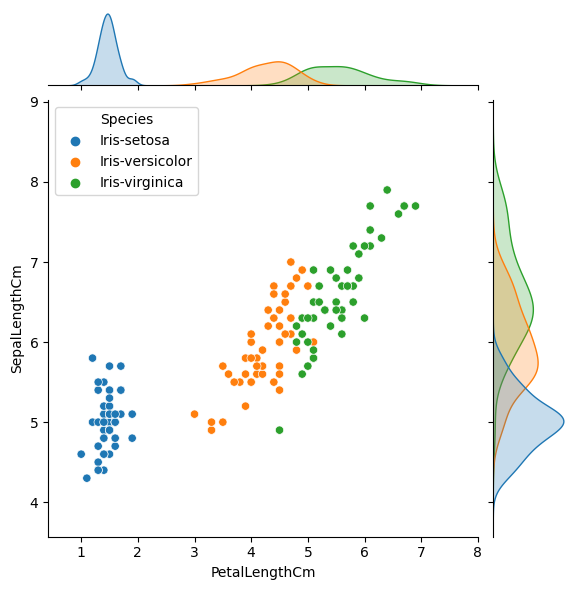

In [90]:
print(data[['Species']].unique())
sns.jointplot(x=data['PetalLengthCm'], y=data['SepalLengthCm'], hue=data['Species'])

# Model 1

In [91]:
y = data[['SepalLengthCm']]
x = data[['SepalWidthCm']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.head(5))
print(x_test.head(5))
print(y_train.head(5))
print(y_test.head(5))

shape: (5, 1)
┌──────────────┐
│ SepalWidthCm │
│ ---          │
│ f64          │
╞══════════════╡
│ 2.5          │
│ 2.3          │
│ 4.2          │
│ 3.1          │
│ 3.2          │
└──────────────┘
shape: (5, 1)
┌──────────────┐
│ SepalWidthCm │
│ ---          │
│ f64          │
╞══════════════╡
│ 3.6          │
│ 3.0          │
│ 3.4          │
│ 3.8          │
│ 2.5          │
└──────────────┘
shape: (5, 1)
┌───────────────┐
│ SepalLengthCm │
│ ---           │
│ f64           │
╞═══════════════╡
│ 5.7           │
│ 5.5           │
│ 5.5           │
│ 4.8           │
│ 6.5           │
└───────────────┘
shape: (5, 1)
┌───────────────┐
│ SepalLengthCm │
│ ---           │
│ f64           │
╞═══════════════╡
│ 5.0           │
│ 5.9           │
│ 5.4           │
│ 7.7           │
│ 6.3           │
└───────────────┘


e.	Create an object named as lr and assign memory from linearregression() method.

In [92]:
lr = LinearRegression().fit(X=x_train, y=y_train)
y_pred = lr.predict(x_test)
print(y_pred[:5])
print(y_train.head(5))

[[5.72047174]
 [5.84120197]
 [5.76071515]
 [5.68022833]
 [5.9418105 ]]
shape: (5, 1)
┌───────────────┐
│ SepalLengthCm │
│ ---           │
│ f64           │
╞═══════════════╡
│ 5.7           │
│ 5.5           │
│ 5.5           │
│ 4.8           │
│ 6.5           │
└───────────────┘


i.	Try to find out mean_squared_error in prediction using method after passing parameter as y_test and y_pred ,mind the result

In [93]:
mean_squared_error(y_pred, y_test)

0.5943595823013256

# Model 2

In [94]:
y = data[['SepalLengthCm']]
x = data[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [95]:
lr = LinearRegression().fit(X=x_train, y=y_train)
y_pred = lr.predict(x_test)
print(y_pred[:5])
print(y_train.head(5))

[[5.17007497]
 [5.99493821]
 [4.64047889]
 [5.25643969]
 [5.49944916]]
shape: (5, 1)
┌───────────────┐
│ SepalLengthCm │
│ ---           │
│ f64           │
╞═══════════════╡
│ 6.3           │
│ 6.7           │
│ 4.4           │
│ 6.3           │
│ 6.5           │
└───────────────┘


In [96]:
mean_squared_error(y_pred, y_test)

0.12308776502764933

g.	Describe which model is better and why?

Definitely the second model because you are using more data to try and predict the results, rather than using only 1 column we use 3.

# Extension - Getting an accurate series of values based on species

In [104]:
versicolor = data.filter(data['Species'] == 'Iris-versicolor')[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
setosa = data.filter(data['Species'] == 'Iris-setosa')[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
virginica = data.filter(data['Species'] == 'Iris-virginica')[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

def getPredictionRow(dataframe: pl.DataFrame, species):
    row = {
        'SepalLengthCm' : 0,
        'SepalWidthCm' : 0,
        'PetalLengthCm' : 0,
        'PetalWidthCm' : 0,
        'Species' : f'{species}-predict'
    }
    # Predict Sepal Length
    y = dataframe[['SepalLengthCm']]
    x = dataframe[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    lr = LinearRegression().fit(X=x_train, y=y_train)
    y_pred = lr.predict(x_test)
    row['SepalLengthCm'] = y_pred[0][0]

    # Predict Sepal Width
    y = dataframe[['SepalWidthCm']]
    x = dataframe[['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    lr = LinearRegression().fit(X=x_train, y=y_train)
    y_pred = lr.predict(x_test)
    row['SepalWidthCm'] = y_pred[0][0]

    # Predict Petal Length
    y = dataframe[['PetalLengthCm']]
    x = dataframe[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    lr = LinearRegression().fit(X=x_train, y=y_train)
    y_pred = lr.predict(x_test)
    row['PetalLengthCm'] = y_pred[0][0]

    # Predict Petal Width
    y = dataframe[['PetalWidthCm']]
    x = dataframe[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    lr = LinearRegression().fit(X=x_train, y=y_train)
    y_pred = lr.predict(x_test)
    row['PetalWidthCm'] = y_pred[0][0]


    return row



pl.DataFrame(getPredictionRow(versicolor, 'versicolor'))

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
f64,f64,f64,f64,str
6.210809,2.834032,5.065745,1.280595,"""versicolor-pre…"


Versicolor Prediction

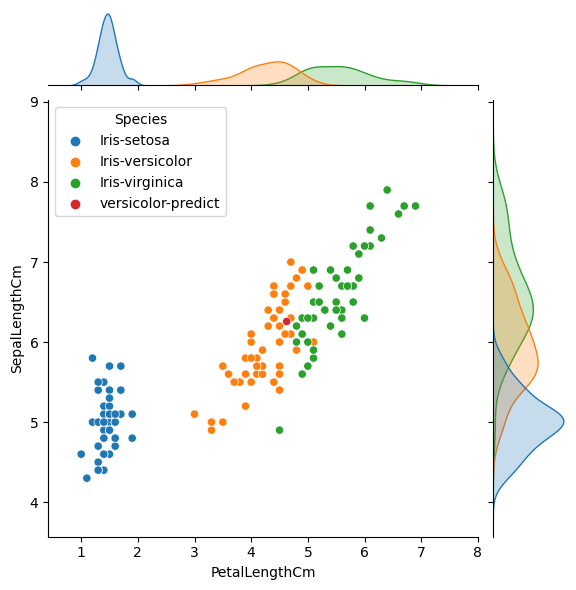

In [98]:
showcase = pl.concat([data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], pl.DataFrame(getPredictionRow(versicolor, 'versicolor'))])
sns.jointplot(x=showcase['PetalLengthCm'], y=showcase['SepalLengthCm'], hue=showcase['Species'])

Setosa Prediction

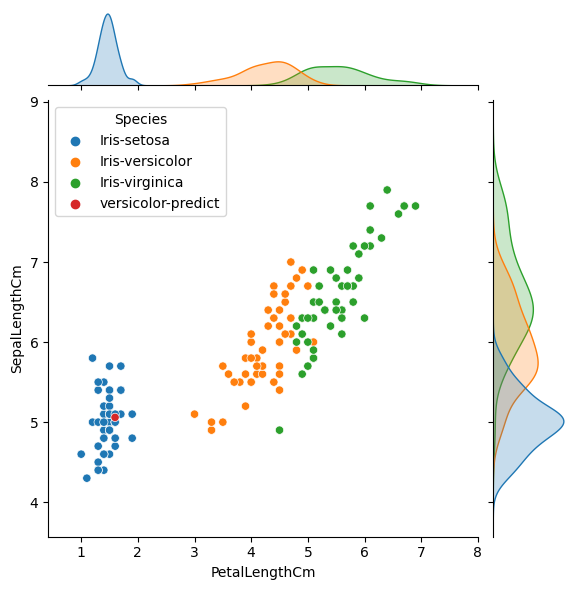

In [103]:
showcase = pl.concat([data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], pl.DataFrame(getPredictionRow(setosa, 'versicolor'))])
sns.jointplot(x=showcase['PetalLengthCm'], y=showcase['SepalLengthCm'], hue=showcase['Species'])

Virginica Prediction

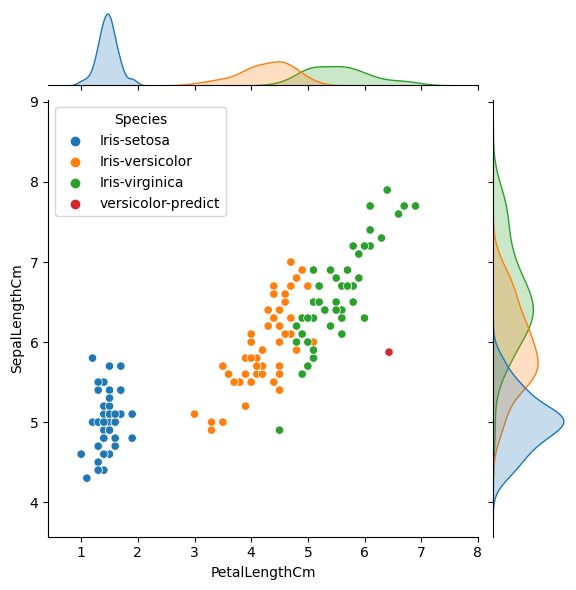

In [120]:
showcase = pl.concat([data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], pl.DataFrame(getPredictionRow(virginica, 'versicolor'))])
sns.jointplot(x=showcase['PetalLengthCm'], y=showcase['SepalLengthCm'], hue=showcase['Species'])